# Graded Challenge 2 


## Perkenalan 

Name        : Aan Nurliyanah

Batch       : 002

### Query 

dataset ml_datasets dari database bernama census_adult_income.

SELECT 
age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM `bigquery-public-data.ml_datasets.census_adult_income` 
WHERE workclass != " ?" AND hours_per_week < 100
LIMIT 3986


Limit data menggunakna ketentuan batch dikali tahun lahir,
Batch 2 dan lahir tahun 1993, 2 x 1993 = 3986.



### Assignment Objectives

Graded Challenge 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

### Problems

Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset yang sudah kalian simpan.

## Import Libraries 

Library yang digunakan:
- pandas, numpy, seaborn dan matplotlib untuk analisis dan perhitungan data dan visualisasi 
- train_test_split untuk memisahkan antara data train dan test 
- winsorizer untuk melakukan handling outlier 
- minmaxscaler untuk distribusi tidak normal 
- ordinalencoder dan onehotencoder untuk encode 
- logisticregression dan svm untuk modeling klasifikasi 
- mean_absolute_error untuk melakukan evaluasi model
- accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
untuk melihat hasil dari model 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install feature_engine
!pip install sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action='ignore')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading 

Memanggil data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values '?',' ','99999','N/A' akan didefinisikan sebagai nan

In [6]:
data = pd.read_csv('h8dsft_P1G2_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'],skipinitialspace = True)

menampilkan data teratas atau head sebanyak 5 

In [7]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0.0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0.0,0,33,NaN,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0.0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,21,United-States,<=50K


Menampilkan data urutan terbawah sebanyak default 5

In [8]:
data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
3981,80,Self-emp-not-inc,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0.0,0,20,United-States,<=50K
3982,68,Private,9th,5,Divorced,Farming-fishing,Not-in-family,Black,Male,0.0,0,20,United-States,<=50K
3983,35,Private,12th,8,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0,20,United-States,<=50K
3984,33,Private,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0,20,United-States,<=50K
3985,57,Self-emp-not-inc,Masters,14,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0,20,United-States,<=50K


Melihat informasi dari data berapa banyak kolom dan baris, dan type 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3986 non-null   int64  
 1   workclass       3986 non-null   object 
 2   education       3986 non-null   object 
 3   education_num   3986 non-null   int64  
 4   marital_status  3986 non-null   object 
 5   occupation      3984 non-null   object 
 6   relationship    3986 non-null   object 
 7   race            3986 non-null   object 
 8   sex             3986 non-null   object 
 9   capital_gain    3971 non-null   float64
 10  capital_loss    3986 non-null   int64  
 11  hours_per_week  3986 non-null   int64  
 12  native_country  3919 non-null   object 
 13  income_bracket  3986 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 436.1+ KB


Mengecek duplikasi data dengan menggunakan data.duplicated dan melihat banyak baris dan kolom nya

In [10]:
data[data.duplicated()].shape

(259, 14)

Terdapat 259 baris data duplikat 

Mengecek apakah ada data missing value

In [11]:
data.isnull().sum()

age                0
workclass          0
education          0
education_num      0
marital_status     0
occupation         2
relationship       0
race               0
sex                0
capital_gain      15
capital_loss       0
hours_per_week     0
native_country    67
income_bracket     0
dtype: int64

Terdapat missing value di kolom occupation sebesar 2, capital_gain sebesar 15, dan native country sebanyak 67. 

Melihat banyak nya missing value dengan menggunakan presentase dari mean

In [12]:
data.isnull().mean()*100

age               0.000000
workclass         0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.050176
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.376317
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.680883
income_bracket    0.000000
dtype: float64

Missing value terdapat pada kolom occupation 0.05%, capital gain sebesar 0.37 % dan native_country 1.68%. Missing value akan di drop di section data cleaning

Membagi data kedalam type categorical dan numerical 

In [13]:
numerical_col = data.describe().columns.tolist()
categorical_col = data.select_dtypes(include=['object']).columns.tolist()

### Numerical 

Melihat overview data secara keseluruhan pada numerical kolom

In [14]:
data[numerical_col].describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,3986.000000,3986.000000,3971.000000,3986.000000,3986.000000
mean,37.091069,9.717010,391.721229,75.698194,32.135223
std,17.146486,2.593147,2083.263078,379.896714,24.030460
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,22.000000,9.000000,0.000000,0.000000,15.000000
50%,33.000000,10.000000,0.000000,0.000000,20.000000
75%,49.000000,11.000000,0.000000,0.000000,46.000000
max,90.000000,16.000000,34095.000000,4356.000000,99.000000


Terdapat anomali pada kolom capital_gain dan capital_loss, selanjutnya kita lihat isi data nya dari 2 kolom tsb.

In [15]:
data.capital_gain.value_counts()

0.0        3724
15024.0      21
7688.0       20
594.0        15
7298.0       12
           ... 
1409.0        1
4416.0        1
3942.0        1
4508.0        1
2050.0        1
Name: capital_gain, Length: 80, dtype: int64

banyak nilai 0 pada kolom capital gain 

In [16]:
data.capital_loss.value_counts()

0       3826
1602      20
1977      16
1902      11
1719       9
2415       8
1887       7
1564       6
1740       5
1590       5
1721       4
2179       4
1876       4
2377       3
1485       3
2258       3
1617       3
2051       3
1504       2
2042       2
2824       2
1825       2
2444       2
2246       2
1672       2
1594       2
2206       2
1408       2
1980       2
1974       1
2057       1
2467       1
419        1
1579       1
1628       1
2174       1
323        1
2129       1
2149       1
2392       1
4356       1
625        1
1848       1
1668       1
2559       1
1648       1
1741       1
2205       1
1762       1
1816       1
1944       1
2001       1
3683       1
Name: capital_loss, dtype: int64

Banyak nilai 0 pada kolom capital_loss, selanjutnya akna dilihat seberapa besar ukuran nya secara manual.

In [17]:
data.shape

(3986, 14)

menghitung total nilai 0 pada kolom capital_gain

In [18]:
3724/3986*100

93.4269944806824

menghitung total nilai 0 pada kolom capital_loss

In [19]:
3826/3986*100

95.98595082789764

Terdapat anomali pada kolom capital_gain dan capital_loss karena nilai maksimumnya jauh lebih besar dari Q3 nya, selain itu nilai Q1, Q2,Q3 nya 0. Selain itu missing value pun terdapat pada kolom capital_gain. Banyak nya kolom yg berisi nilai 0 , pada capital gain sejumlah 3724 atau sebesar 93.42 %, dan capital_loss sejumlah 3826 atau sebesar 95.98 % Dari total 3986 data. 

namun karena data berisikan data sensus dimana menurut pendapat saya data capital_gain dan capital_loss itu berpengaruh , maka 2 kolom ini tidak saya drop dan kita lihat analisis selanjutnya. 

Melihat data missing value pada kolom capital gain 

In [20]:
data[data.capital_gain.isnull()]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
58,49,State-gov,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,NaN,0,80,United-States,>50K
59,42,Self-emp-not-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,NaN,0,80,United-States,>50K
77,46,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,NaN,0,72,United-States,>50K
684,55,Private,9th,5,Divorced,Craft-repair,Unmarried,White,Female,NaN,0,37,United-States,>50K
1135,53,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,NaN,0,37,United-States,>50K
1193,59,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,0,43,United-States,>50K
1199,40,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,0,75,United-States,>50K
1235,50,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,0,80,United-States,>50K
1242,49,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,0,37,United-States,>50K
1291,49,Self-emp-inc,Masters,14,Divorced,Prof-specialty,Unmarried,White,Male,NaN,0,80,Mexico,>50K


### Categorical

Melihat overview dari kolom kategori, banyak data dan nama nama value nya 

In [21]:
# categorical overview
for i in categorical_col:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

workclass

Private             2866
Self-emp-not-inc     435
Local-gov            254
State-gov            229
Self-emp-inc         125
Federal-gov           71
Without-pay            4
Never-worked           2
Name: workclass, dtype: int64
----------
education

Some-college    1115
HS-grad         1074
Bachelors        490
11th             309
Masters          167
10th             161
Assoc-voc        119
Assoc-acdm       117
12th              87
7th-8th           86
9th               69
Prof-school       69
Doctorate         48
5th-6th           35
1st-4th           33
Preschool          7
Name: education, dtype: int64
----------
marital_status

Never-married            1833
Married-civ-spouse       1334
Divorced                  439
Widowed                   219
Separated                 108
Married-spouse-absent      50
Married-AF-spouse           3
Name: marital_status, dtype: int64
----------
occupation

Other-service        809
Sales                625
Adm-clerical         565
P

In [22]:
data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

Dari overview kolom kategorikal saya akan membandingkan education_num dan education untuk melihat kesamaan datanya, karena kemungkinan kedua kolom ini merepresentasikan data yang sama yaitu data pendidikan.

In [23]:
edu = data[['education_num','education']].value_counts().sort_index(ascending=True)
edu

education_num  education   
1              Preschool          7
2              1st-4th           33
3              5th-6th           35
4              7th-8th           86
5              9th               69
6              10th             161
7              11th             309
8              12th              87
9              HS-grad         1074
10             Some-college    1115
11             Assoc-voc        119
12             Assoc-acdm       117
13             Bachelors        490
14             Masters          167
15             Prof-school       69
16             Doctorate         48
dtype: int64

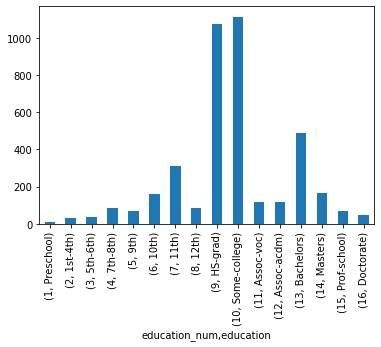

In [24]:
edu.plot(kind='bar')

Dari hasil pengamatan ,keduanya merepresentasi hasil yang sama, educational num sudah diwakili oleh education jadi kolom educational_num akan di drop. Urutan dari education_num akna digunakan sbg dasar untuk melakukan pengelompokan data di section selanjutnya.

Selain itu, akan dilihat juga review dari marital status, relationship dan sex apakah data saling merepresentasi atau tidak 

In [25]:
marital = data[['marital_status','relationship','sex']].value_counts()
marital

marital_status         relationship    sex   
Married-civ-spouse     Husband         Male      1077
Never-married          Own-child       Female     622
                                       Male       536
                       Not-in-family   Female     261
                                       Male       238
Married-civ-spouse     Wife            Female     232
Divorced               Not-in-family   Female     138
                       Unmarried       Female     131
Widowed                Not-in-family   Female     116
Divorced               Not-in-family   Male       105
Separated              Unmarried       Female      60
Widowed                Unmarried       Female      59
Never-married          Unmarried       Female      59
                       Other-relative  Female      45
                                       Male        45
                       Unmarried       Male        27
Divorced               Unmarried       Male        26
Widowed                Not-in-family

Dari hasil pengamatan 3 kolom ini punya materi masing-masing dan kolom tetap dipertahankan 

Selanjutnya overview kolom workclass dan occupation

In [26]:
data[['workclass','occupation']].value_counts()


workclass         occupation       
Private           Other-service        684
                  Sales                520
                  Adm-clerical         420
                  Prof-specialty       290
                  Craft-repair         216
                                      ... 
Self-emp-inc      Protective-serv        1
Federal-gov       Armed-Forces           1
Local-gov         Handlers-cleaners      1
                  Machine-op-inspct      1
Self-emp-not-inc  Machine-op-inspct      1
Length: 72, dtype: int64

Data workclass dan occupation akan tetap digunakan karena mempunyai nilai masing-masing 

## Data Cleaning

Membuat variabel baru bernama data_clean

In [27]:
data_clean = data.copy()

Mengecek lagi data duplicated untuk selanjutnya akan di drop

In [28]:
data_clean[data_clean.duplicated()].shape

(259, 14)

In [29]:
data_clean.drop_duplicates(inplace=True)
data_clean[data_clean.duplicated()].shape

(0, 14)

Selanjutnya menghapus missing value 

In [30]:
data_clean.dropna(axis=0, inplace=True)

Selanjutnya menghapus kolom education_num

In [31]:
data_clean.drop(['education_num'], axis=1, inplace=True)

In [32]:
data_clean.shape

(3643, 13)

data sudah siap digunakan dengan banyak nya 3643 baris dan 13 kolom 

## Exploratory Data Analysis (EDA)

### EDA For Analysis

In [33]:
data_clean.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
2,39,Self-emp-not-inc,HS-grad,Married-civ-spouse,Sales,Wife,Black,Female,0.0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,18,United-States,<=50K
4,64,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,21,United-States,<=50K
5,31,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,18,United-States,<=50K
6,53,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,26,United-States,<=50K


Melihat banyaknya data income bracket melalui visualisasi plot 

In [151]:
data_clean.income_bracket.value_counts()

<=50K    3064
>50K      579
Name: income_bracket, dtype: int64

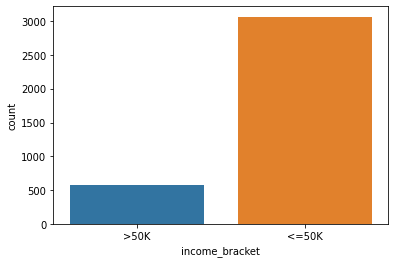

In [34]:
sns.countplot(data=data_clean,x='income_bracket')

Dari visualisasi diatas didapatkan bahwa banyaknya data income_bracket tidak seimbang yaitu lebih banyak data <=50 k

Melihat visualisasi dari ocuuppation dan income bracket 

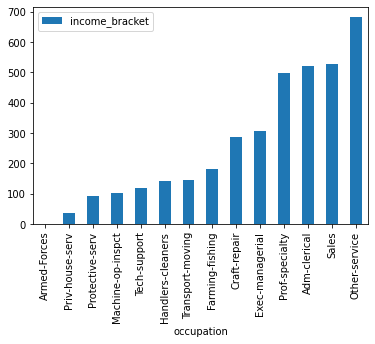

In [36]:
data_clean.groupby('occupation')[['income_bracket']].count().sort_values('income_bracket').plot(kind='bar')

Pada kolom occupation didapatkan banyak nya pekerjaan adalah di bagian other service dan di nilai nilai lain juga persebaran data nya lumayan banyak sheingga akan dipertimbangkan sebagai feature 

Melihat visualisasi antara data age dan hours_per_week

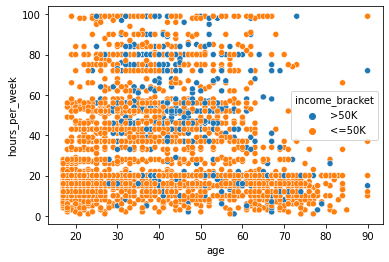

In [37]:
sns.scatterplot(x='age',y='hours_per_week',data=data_clean,hue='income_bracket')

Persebaran data tidak menentu atau tidak berpola, kita akna pertimbangkan 2 kolom ini sebagai feature juga. 

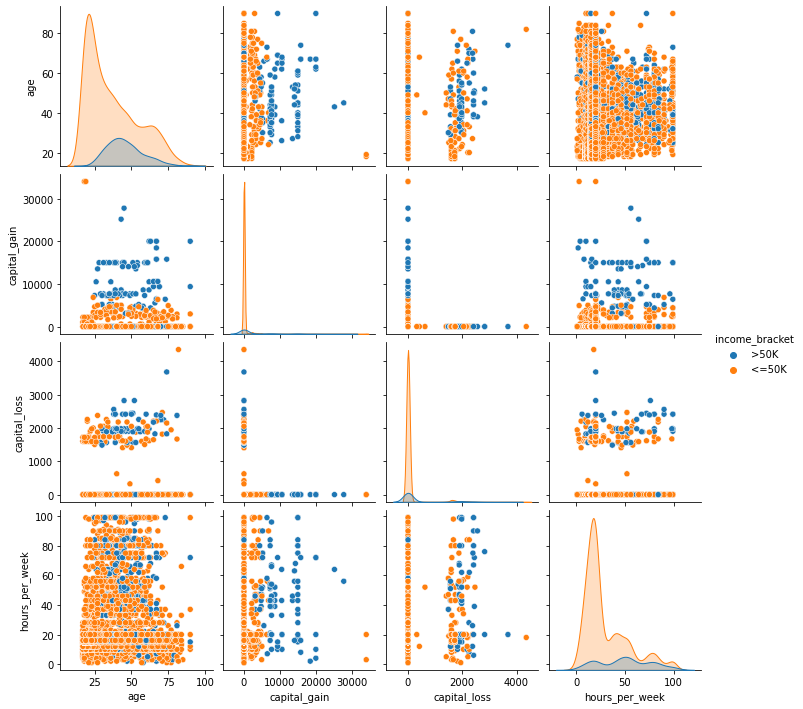

In [38]:
sns.pairplot(data_clean,hue='income_bracket')

dari visualisasi diatas didapatkan juga jika data <=50k lebih banyak dibandingkan dengan >50k

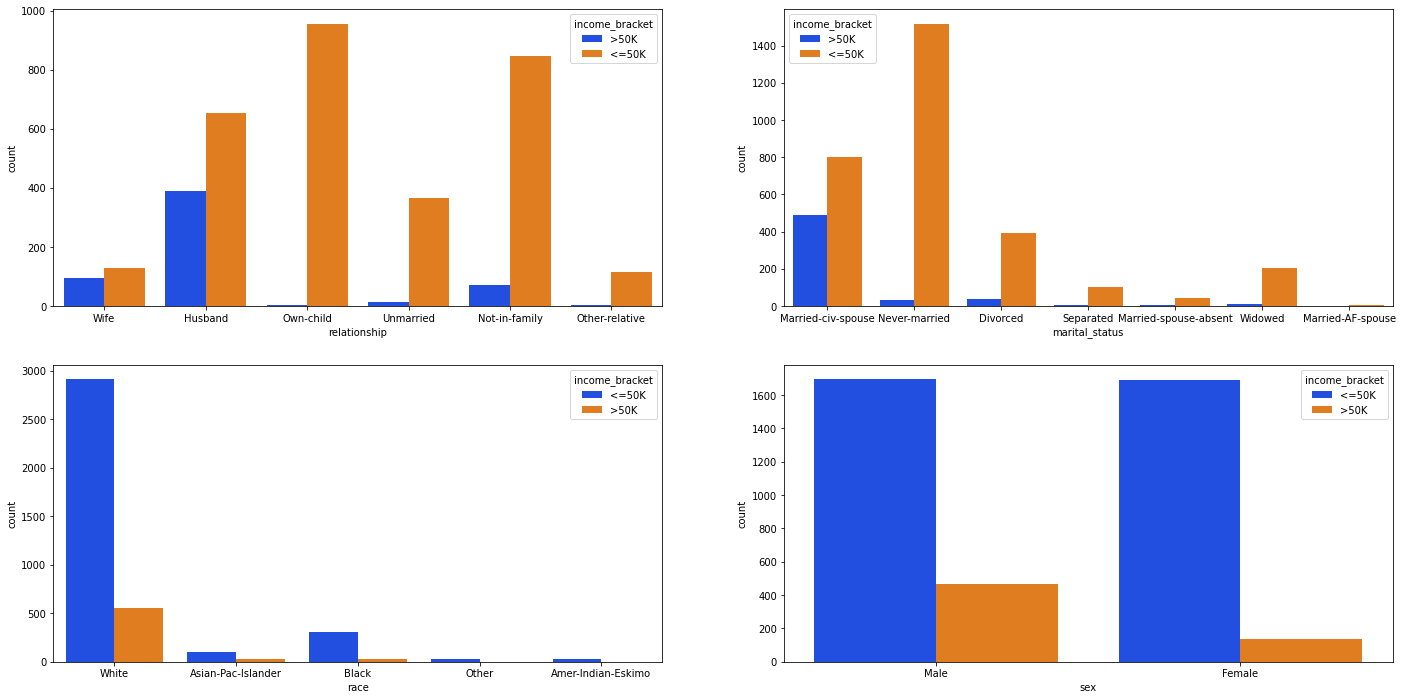

In [155]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(24,12))
sns.countplot(data=data_clean, x='relationship', hue='income_bracket', ax=ax[0,0], palette='bright')
sns.countplot(data=data_clean, x='marital_status', hue='income_bracket', ax=ax[0,1], palette='bright')
sns.countplot(data=data, x='race', hue='income_bracket', ax=ax[1,0], palette='bright')
sns.countplot(data=data, x='sex', hue='income_bracket', ax=ax[1,1], palette='bright');

Dari visualisasi diatas didaptkan bahwa untuk untuk income >50k dari kolom relationship dapat dilihat jumlah terbanyak ada di kategori ownchild, dari segi married status nnya adalah never-married yang terbanyak, sedangkan untuk income <=50k dilihat dari kategori race, ras yang paling bnayak adalah white , dan sex adalah male dan female setara

Melihat seklias hubungan antara kolom numerical 

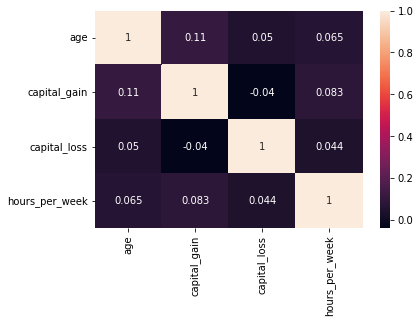

In [39]:
sns.heatmap(data_clean.corr(),annot=True)

Antar kolom tidak terlalu mempunyai hubungan 

Memisahkan data untuk model inference sebanyak 5 data dengan random_state sebesar 15. 

In [47]:
#data untuk model inference
data_inf = data_clean.sample(5,random_state=15)
data_inf

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1234,60,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,2415,80,United-States,>50K
252,58,Private,Masters,Widowed,Sales,Not-in-family,White,Female,0.0,0,27,United-States,<=50K
275,19,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,0.0,0,28,United-States,<=50K
235,29,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,0.0,0,34,United-States,<=50K
174,20,Private,Some-college,Never-married,Sales,Own-child,White,Female,0.0,0,8,United-States,<=50K


In [48]:
# Menghapus Inference-Set dari Dataset

data_train_test = data_clean.drop(data_inf.index)
data_train_test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
2,39,Self-emp-not-inc,HS-grad,Married-civ-spouse,Sales,Wife,Black,Female,0.0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,18,United-States,<=50K
4,64,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,21,United-States,<=50K
5,31,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,18,United-States,<=50K
6,53,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,0.0,0,26,United-States,<=50K


In [49]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,60,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,2415,80,United-States,>50K
1,58,Private,Masters,Widowed,Sales,Not-in-family,White,Female,0.0,0,27,United-States,<=50K
2,19,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,0.0,0,28,United-States,<=50K
3,29,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,0.0,0,34,United-States,<=50K
4,20,Private,Some-college,Never-married,Sales,Own-child,White,Female,0.0,0,8,United-States,<=50K


Split data kedalam x dan y sebagai fitur dan target 

yang akan digunakan sebagai target adalah income_bracket dan sisanya adalah feature, data dibagi kedalan x train, y train, xtest dan y test 

In [50]:
# define feature and target
X = data_train_test.drop('income_bracket', axis=1)
y = data_train_test['income_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2546, 12)
(1092, 12)
(2546,)
(1092,)


Menggabungkan xtrain dan ytrain untuk modelling

In [52]:
# for EDA model 
data_eda = pd.concat([X_train, y_train], axis=1)

data_eda.shape

(2546, 13)

## EDA For Modelling

Memisahkan data antara numerical dan kategorical 

In [53]:
# get name columns for data type numeric and categoric
numerical_col_eda = data_eda.select_dtypes(exclude=['object']).columns.tolist()
category_col_eda = data_eda.select_dtypes(include=['object']).columns.tolist()

Numerical Features

Melihat berapa nilai skew dari kolom numerical 

In [54]:
skew = data_eda[numerical_col_eda].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
age,0.624278
capital_gain,7.566118
capital_loss,5.132236
hours_per_week,1.057094


diketahui bahwa nilai distribusi dari ke 4 kolom adalah distribusi tidak normal, untuk capital gain dan capital loss terlihat bahwa skew sangat besar karena hal tadi yaitu terdapat anomali di dalam datanya. namun hal ini akan kita abaikan berdasarkan pendapat pribadi karena kolom ini akan digunakan untuk melihat apak cocok dijadikan feature atau tidak.

In [55]:
# new variable for plot purpose
numerical = data_eda[numerical_col_eda]
numerical.head()

,age,capital_gain,capital_loss,hours_per_week
3031,40,0.0,0,20
1236,20,0.0,0,2
82,53,0.0,0,80
746,46,0.0,0,43
1649,72,0.0,0,74


Selnajutnya kita akan melihat dari visualisasi distirbusi nya dan boxplot nya

In [56]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

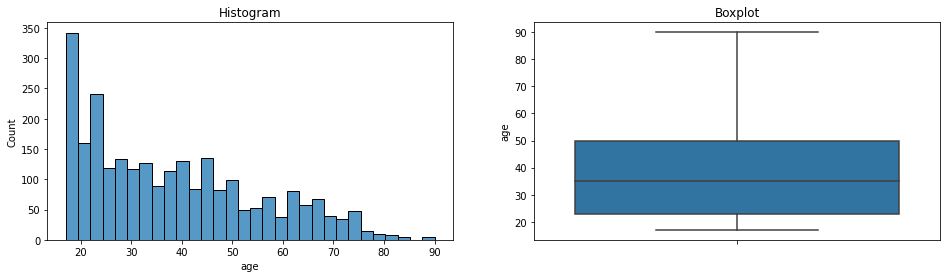

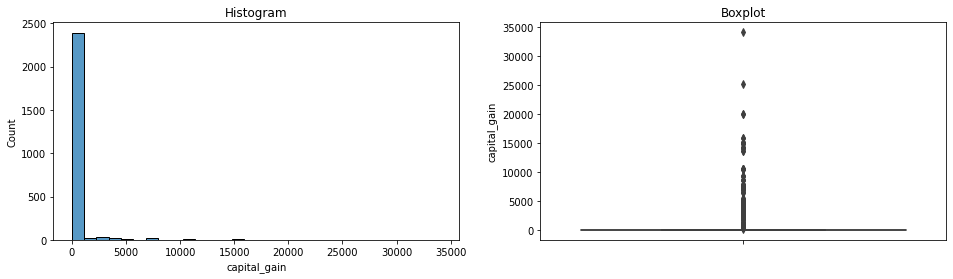

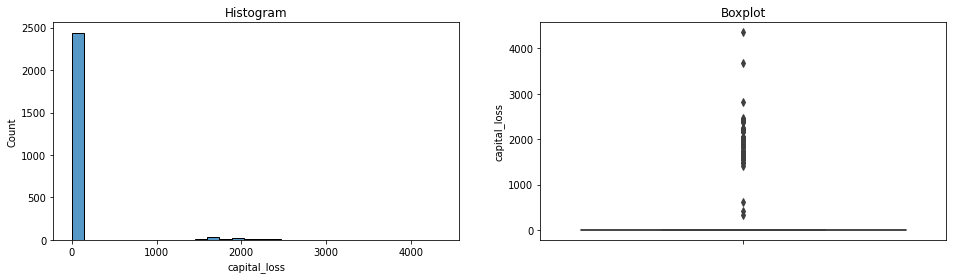

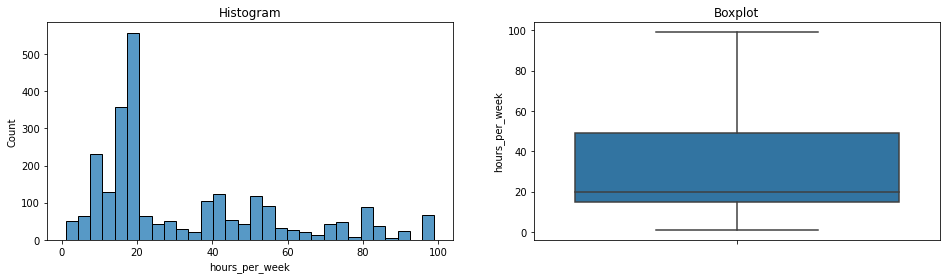

In [57]:
diagnostic_plots(numerical, 'age')
diagnostic_plots(numerical, 'capital_gain')
diagnostic_plots(numerical, 'capital_loss')
diagnostic_plots(numerical, 'hours_per_week')


Terlihat age dan hours right skew dan tidak memiliki outlier. Kemudian capital loss dan gain banyakj terdapat outlier namun akan kita abaikan .

Handling outlier age

melihat presentase dari jumlah outlier darimasing masing kolom 

In [58]:
# outlier detection using IQR 
Q3 = data_eda['age'].quantile(.75)
Q1 = data_eda['age'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = data_eda[(data_eda['age'] > upper) | (data_eda['age'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent age of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  0
percent age of outlier:  0.0 %


jumlah outlier 0 dari kolom age, 

In [59]:
# outlier detection using IQR 
Q3 = data_eda['capital_gain'].quantile(.75)
Q1 = data_eda['capital_gain'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = data_eda[(data_eda['capital_gain'] > upper) | (data_eda['capital_gain'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent capital_gain of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  177
percent capital_gain of outlier:  6.952081696779261 %


jumlah outlier capital gain cukup banyak dnegan total 6.9 % 

In [60]:
# outlier detection using IQR 
Q3 = data_eda['capital_loss'].quantile(.75)
Q1 = data_eda['capital_loss'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = data_eda[(data_eda['capital_loss'] > upper) | (data_eda['capital_loss'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent capital_loss of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  106
percent capital_loss of outlier:  4.163393558523174 %


jumlah outlier dari capital loss sebanyak 4,16 % 

In [61]:
# outlier detection using IQR 
Q3 = data_eda['hours_per_week'].quantile(.75)
Q1 = data_eda['hours_per_week'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = data_eda[(data_eda['hours_per_week'] > upper) | (data_eda['hours_per_week'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent hours_per_week of outlier: ', outlier.shape[0]/data_eda.shape[0] * 100, '%')

count of outlier:  0
percent hours_per_week of outlier:  0.0 %


Jumlah outlier dari hour per week sebesar 0 

Kita akan melakukan capping dengan metode iqr dan nilai fold 1.5 denga pertimbangan bahwa nilai skew nya masih terhitung 1 sehingga menggunakan iqr atau distribusi tidaknormal 

In [62]:
# capping outlier 
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
variables=['age','hours_per_week'])

data_eda_capping = wins.fit_transform(data_eda)

In [63]:
# Compare before and after outlier handling
print('before handling: \n', data_eda[numerical_col_eda].describe())

print('after handling: \n', data_eda_capping[numerical_col_eda].describe())

before handling: 
               age  capital_gain  capital_loss  hours_per_week
count  2546.00000   2546.000000   2546.000000     2546.000000
mean     38.22663    388.784760     78.613119       33.018068
std      17.04355   1966.634052    389.659517       24.671971
min      17.00000      0.000000      0.000000        1.000000
25%      23.00000      0.000000      0.000000       15.000000
50%      35.00000      0.000000      0.000000       20.000000
75%      50.00000      0.000000      0.000000       49.000000
max      90.00000  34095.000000   4356.000000       99.000000
after handling: 
               age  capital_gain  capital_loss  hours_per_week
count  2546.00000   2546.000000   2546.000000     2546.000000
mean     38.22663    388.784760     78.613119       33.018068
std      17.04355   1966.634052    389.659517       24.671971
min      17.00000      0.000000      0.000000        1.000000
25%      23.00000      0.000000      0.000000       15.000000
50%      35.00000      0.000000  

Dari perbandingan central tendency didaptakan bahwa tidak ada data yg berubah, atau central tendency sama, sehingga dapat di definisikan tidak ada data outlier pada age dan hours 

Categorical Features 

In [64]:
data_eda_category = data_eda[category_col_eda]
data_eda_category.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket
3031,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,>50K
1236,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
82,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
746,Private,HS-grad,Divorced,Tech-support,Not-in-family,White,Female,United-States,<=50K
1649,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K


Melihat banyak nya nilai value dari kolom kategori

In [65]:
for i in data_eda_category.columns.tolist():
    print(f'num of unique label in {i}: ', len(data_eda_category[i].unique()))

num of unique label in workclass:  7
num of unique label in education:  16
num of unique label in marital_status:  7
num of unique label in occupation:  13
num of unique label in relationship:  6
num of unique label in race:  5
num of unique label in sex:  2
num of unique label in native_country:  36
num of unique label in income_bracket:  2


native, occupation, education have more than 10 unique labels, or high cardinality. Maka dari itu kolom kolom ini akan kita sederhanakan atau kita kelompokan lagi menjadi lebih sedikit unique nya

fe : native_country

In [156]:
data_eda_category['native_country'].unique()

array(['United-States', 'Germany', 'Mexico', 'Puerto-Rico', 'El-Salvador',
       'Philippines', 'Taiwan', 'Vietnam', 'Cuba', 'China', 'Haiti',
       'Poland', 'Columbia', 'India', 'Iran', 'Thailand', 'Guatemala',
       'Japan', 'Dominican-Republic', 'France', 'South', 'England',
       'Ecuador', 'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Canada',
       'Jamaica', 'Trinadad&Tobago', 'Italy', 'Yugoslavia', 'Nicaragua',
       'Peru', 'Honduras', 'Greece', 'Scotland', 'Portugal'], dtype=object)

data native akan diubah menjadi 6 kategori menjadi kategori benua, alasannya karena 6 benua ini dengan populasi terbanyak. 

In [67]:
native_continent = []

for loc in data_eda_category['native_country']:
    if loc in ['Philippines','Vietnam','China','Taiwan','Japan','Thailand','India','Iran']:
        native_continent.append('Asia')
    elif loc in ['South']:
        native_continent.append('Australia')
    elif loc in ['England','France','Poland','Germany','Italy','Hungary','Portugal','Scotland','Greece','Yugoslavia']:
        native_continent.append('Europe')
    elif loc in ['United-States','Canada','Cuba','Puerto-Rico','Mexico','Haiti', 'Guatemala','El-Salvador','Dominican-Republic','Jamaica','Nicaragua','Honduras','Outlying-US(Guam-USVI-etc)']:
        native_continent.append('North America')
    elif loc in ['Columbia', 'Ecuador','Trinadad&Tobago','Peru']:
        native_continent.append('South America')
    else:
        native_continent.append('Africa')

data_eda_category['native_continent'] = native_continent

In [68]:
data_eda_category.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket,native_continent
3031,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,>50K,North America
1236,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K,North America
82,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K,North America
746,Private,HS-grad,Divorced,Tech-support,Not-in-family,White,Female,United-States,<=50K,North America
1649,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K,North America


In [69]:
data_eda_category.native_continent.value_counts()

North America    2432
Asia               49
Europe             43
South America      11
Australia          11
Name: native_continent, dtype: int64

fe :occupation

In [71]:
occup_change = data_eda_category['occupation'].value_counts().head(10).index.tolist().copy()
occup_change

['Other-service',
 'Sales',
 'Adm-clerical',
 'Prof-specialty',
 'Exec-managerial',
 'Craft-repair',
 'Farming-fishing',
 'Handlers-cleaners',
 'Transport-moving',
 'Tech-support']

Occupation akan dibagi menjadi 10 data teratas saja, yg lain nya akan masuk ke dalam other service 

In [72]:
occup_change_to = []

for i in data_eda_category['occupation']:
    if i in occup_change:
        occup_change_to.append(i)
    else:
        occup_change_to.append('Other-service')

data_eda_category['occupation_new'] = occup_change_to.copy()


In [73]:
data_eda_category.occupation_new.value_counts()

Other-service        639
Sales                366
Adm-clerical         365
Prof-specialty       349
Exec-managerial      220
Craft-repair         186
Farming-fishing      136
Handlers-cleaners    102
Transport-moving      98
Tech-support          85
Name: occupation_new, dtype: int64

fe : workclass

untuk workclass akan dibagi menjadi  4 kategori 

In [74]:
workclass_new = []

for work in data_eda_category['workclass']:
    if work in ['Private']:
        workclass_new.append('Private')
    elif work in ['Self-emp-not-inc','Self-emp-inc']:
        workclass_new.append('Self-Emp')
    elif work in ['Local-gov','State-gov','Federal-gov']:
        workclass_new.append('Gov')
    else:
        workclass_new.append('Others')

data_eda_category['workclass_new'] = workclass_new

fe : marital_status

Untuk marital status akan dibagi menjadi 3 kategori sbb

In [75]:
marital_status_new = []

for work in data_eda_category['marital_status']:
    if work in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        marital_status_new.append('married')
    elif work in ['Divorced','Widowed','Separated']:
        marital_status_new.append('ever-married')
    else:
        marital_status_new.append('single')

data_eda_category['marital_status_new'] = marital_status_new

fe : education

In [76]:
data_eda_category.education.unique()

array(['HS-grad', 'Some-college', 'Assoc-acdm', 'Bachelors', '12th',
       'Assoc-voc', '11th', '9th', 'Prof-school', 'Masters', '7th-8th',
       '10th', 'Doctorate', '1st-4th', '5th-6th', 'Preschool'],
      dtype=object)

Untuk data education akna dibagi menjadi 5 kategori sbb

In [77]:
education_new = []

for work in data_eda_category['education']:
    if work in ['Masters','Prof-school','Doctorate']:
        education_new.append('post-graduate')
    elif work in ['Some-college','Assoc-voc','Assoc-acdm','Bachelors']:
        education_new.append('graduate')
    elif work in ['10th','11th','12th','HS-grad']:
        education_new.append('senior-hs')
    elif work in ['7th-8th','9th']:
        education_new.append('junior-hs')
    else:
        education_new.append('elementary')

data_eda_category['education_new'] = education_new

In [78]:
data_eda_category.education_new.value_counts()

graduate         1164
senior-hs        1046
post-graduate     181
junior-hs         100
elementary         55
Name: education_new, dtype: int64

In [79]:
data_eda_category.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket,native_continent,occupation_new,workclass_new,marital_status_new,education_new
3031,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,>50K,North America,Adm-clerical,Gov,married,senior-hs
1236,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K,North America,Prof-specialty,Private,single,graduate
82,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K,North America,Sales,Private,married,graduate
746,Private,HS-grad,Divorced,Tech-support,Not-in-family,White,Female,United-States,<=50K,North America,Tech-support,Private,ever-married,senior-hs
1649,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K,North America,Farming-fishing,Self-Emp,married,graduate


In [80]:
data_eda_category.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income_bracket',
       'native_continent', 'occupation_new', 'workclass_new',
       'marital_status_new', 'education_new'],
      dtype='object')

In [81]:
list_category = ['workclass_new', 'education_new', 'marital_status_new', 'occupation_new', 'relationship', 'race','sex','native_continent','income_bracket']

data_eda_category[list_category].head()

,workclass_new,education_new,marital_status_new,occupation_new,relationship,race,sex,native_continent,income_bracket
3031,Gov,senior-hs,married,Adm-clerical,Wife,White,Female,North America,>50K
1236,Private,graduate,single,Prof-specialty,Own-child,White,Female,North America,<=50K
82,Private,graduate,married,Sales,Husband,White,Male,North America,>50K
746,Private,senior-hs,ever-married,Tech-support,Not-in-family,White,Female,North America,<=50K
1649,Self-Emp,graduate,married,Farming-fishing,Husband,White,Male,North America,<=50K


One Hot Encoding for 'workclass_new','marital_status_new','occupation_new','relationship','race','sex','native_continent','income_bracket'

In [82]:
data_eda_category[['workclass_new','marital_status_new','occupation_new','relationship','race','native_continent']].head(5)

,workclass_new,marital_status_new,occupation_new,relationship,race,native_continent
3031,Gov,married,Adm-clerical,Wife,White,North America
1236,Private,single,Prof-specialty,Own-child,White,North America
82,Private,married,Sales,Husband,White,North America
746,Private,ever-married,Tech-support,Not-in-family,White,North America
1649,Self-Emp,married,Farming-fishing,Husband,White,North America


karena data tidak menggunakna urutan maka akan digunakan OHE untuk encodernya

In [83]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

category_ohe = pd.DataFrame(ohe_encoder.fit_transform(data_eda_category[['workclass_new','marital_status_new','occupation_new','relationship','native_continent']]))
category_ohe.columns = ohe_encoder.get_feature_names(['workclass_new','marital_status_new','occupation_new','relationship','native_continent'])

hasil_ohe = pd.concat([data_eda_category[['workclass_new','marital_status_new','occupation_new','relationship','native_continent']].reset_index(drop=True), category_ohe], axis=1)
hasil_ohe

,workclass_new,marital_status_new,occupation_new,relationship,native_continent,workclass_new_Gov,workclass_new_Others,workclass_new_Private,workclass_new_Self-Emp,marital_status_new_ever-married,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America
0,Gov,married,Adm-clerical,Wife,North America,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Private,single,Prof-specialty,Own-child,North America,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Private,married,Sales,Husband,North America,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Private,ever-married,Tech-support,Not-in-family,North America,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Self-Emp,married,Farming-fishing,Husband,North America,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,Private,single,Other-service,Own-child,North America,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2542,Self-Emp,married,Other-service,Wife,Australia,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2543,Gov,married,Farming-fishing,Husband,North America,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2544,Gov,single,Other-service,Own-child,North America,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Ordinal Encoder for education_new, sex dan income_bracket 

In [84]:
data_eda_category.education_new.value_counts()

graduate         1164
senior-hs        1046
post-graduate     181
junior-hs         100
elementary         55
Name: education_new, dtype: int64

In [85]:
data_eda_category.sex.value_counts()

Male      1426
Female    1120
Name: sex, dtype: int64

In [86]:
data_eda_category.income_bracket.value_counts()

<=50K    2141
>50K      405
Name: income_bracket, dtype: int64

Karena ketiga kolom ini mempunyai urutan maka akan di encoder menggunakn ordinal encpder 

In [87]:
education_cat = ['elementary','junior-hs','senior-hs','graduate','post-graduate']
sex = ['Female','Male']
income_bracket = ['<=50K','>50K']

ord_encoder = OrdinalEncoder(categories=[education_cat,sex,income_bracket])
category_ord = pd.DataFrame(ord_encoder.fit_transform(data_eda_category[['education_new','sex','income_bracket']]))

category_ord.columns = ['education_new_ord','sex_ord','income_bracket_ord']
hasil_ord = pd.concat([data_eda_category[['education_new','sex','income_bracket']].reset_index(drop=True), category_ord], axis=1)

hasil_ord

,education_new,sex,income_bracket,education_new_ord,sex_ord,income_bracket_ord
0,senior-hs,Female,>50K,2.0,0.0,1.0
1,graduate,Female,<=50K,3.0,0.0,0.0
2,graduate,Male,>50K,3.0,1.0,1.0
3,senior-hs,Female,<=50K,2.0,0.0,0.0
4,graduate,Male,<=50K,3.0,1.0,0.0
...,...,...,...,...,...,...
2541,senior-hs,Female,<=50K,2.0,0.0,0.0
2542,senior-hs,Female,<=50K,2.0,0.0,0.0
2543,graduate,Male,<=50K,3.0,1.0,0.0
2544,graduate,Female,<=50K,3.0,0.0,0.0


Menggabungkan Numerical and Categorical data after processed

In [88]:
data_eda_encoder = pd.concat([data_eda_capping.reset_index(drop=True), category_ohe, category_ord], axis=1)
data_eda_encoder.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America,education_new_ord,sex_ord,income_bracket_ord
0,40.0,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
1,20.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
2,53.0,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0
3,46.0,Private,HS-grad,Divorced,Tech-support,Not-in-family,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,72.0,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0


In [89]:
data_eda_encoder.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income_bracket',
       'workclass_new_Gov', 'workclass_new_Others', 'workclass_new_Private',
       'workclass_new_Self-Emp', 'marital_status_new_ever-married',
       'marital_status_new_married', 'marital_status_new_single',
       'occupation_new_Adm-clerical', 'occupation_new_Craft-repair',
       'occupation_new_Exec-managerial', 'occupation_new_Farming-fishing',
       'occupation_new_Handlers-cleaners', 'occupation_new_Other-service',
       'occupation_new_Prof-specialty', 'occupation_new_Sales',
       'occupation_new_Tech-support', 'occupation_new_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'native_continent_Asia',
       'native_continent_A

Setelah data di encoder maka data lama akan didrop 

In [90]:
droplist = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','income_bracket']
data_model = data_eda_encoder.drop(droplist, axis=1)

In [91]:
data_model.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_new_Gov,workclass_new_Others,workclass_new_Private,workclass_new_Self-Emp,marital_status_new_ever-married,marital_status_new_married,...,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America,education_new_ord,sex_ord,income_bracket_ord
0,40.0,0.0,0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
1,20.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
2,53.0,0.0,0,80.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0
3,46.0,0.0,0,43.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,72.0,0.0,0,74.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0


### Feature Selection

Menggunakna decision tree untuk memilih feature 

In [92]:
X_select = data_model.drop('income_bracket_ord',axis=1).copy()
y_select = data_model['income_bracket_ord']


Feature: 0, Score: 0.21796
Feature: 1, Score: 0.11196
Feature: 2, Score: 0.04011
Feature: 3, Score: 0.15705
Feature: 4, Score: 0.00758
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01468
Feature: 7, Score: 0.01363
Feature: 8, Score: 0.00827
Feature: 9, Score: 0.18897
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01075
Feature: 12, Score: 0.00528
Feature: 13, Score: 0.03030
Feature: 14, Score: 0.00719
Feature: 15, Score: 0.00390
Feature: 16, Score: 0.01181
Feature: 17, Score: 0.01056
Feature: 18, Score: 0.01186
Feature: 19, Score: 0.00235
Feature: 20, Score: 0.00928
Feature: 21, Score: 0.01038
Feature: 22, Score: 0.00262
Feature: 23, Score: 0.00024
Feature: 24, Score: 0.00444
Feature: 25, Score: 0.00341
Feature: 26, Score: 0.01418
Feature: 27, Score: 0.00717
Feature: 28, Score: 0.00540
Feature: 29, Score: 0.00180
Feature: 30, Score: 0.00638
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.07286
Feature: 33, Score: 0.00766


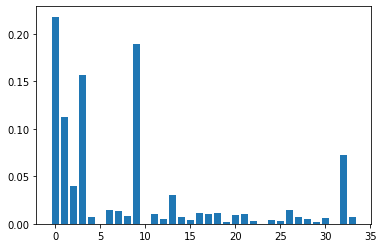

In [93]:
X, y = X_select, y_select
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [94]:
data_model.columns

Index(['age', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_new_Gov', 'workclass_new_Others', 'workclass_new_Private',
       'workclass_new_Self-Emp', 'marital_status_new_ever-married',
       'marital_status_new_married', 'marital_status_new_single',
       'occupation_new_Adm-clerical', 'occupation_new_Craft-repair',
       'occupation_new_Exec-managerial', 'occupation_new_Farming-fishing',
       'occupation_new_Handlers-cleaners', 'occupation_new_Other-service',
       'occupation_new_Prof-specialty', 'occupation_new_Sales',
       'occupation_new_Tech-support', 'occupation_new_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'native_continent_Asia',
       'native_continent_Australia', 'native_continent_Europe',
       'native_continent_North America', 'native_continent_South America',
       'education_new_ord'

Setelah dilakukan feature selection menggunakan decision tree selanjutya terpilih featur dibawah ini, nilai yang diambil adalah diatas 0.1. Terpiliih 4 feature

In [95]:
data_model[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]


,age,capital_gain,hours_per_week,marital_status_new_married,income_bracket_ord
0,40.0,0.0,20.0,1.0,1.0
1,20.0,0.0,2.0,0.0,0.0
2,53.0,0.0,80.0,1.0,1.0
3,46.0,0.0,43.0,0.0,0.0
4,72.0,0.0,74.0,1.0,0.0
...,...,...,...,...,...
2541,17.0,0.0,6.0,0.0,0.0
2542,36.0,0.0,20.0,1.0,0.0
2543,67.0,0.0,8.0,1.0,0.0
2544,22.0,0.0,15.0,0.0,0.0


In [96]:
# numerical scaling

num_col_scalling = ['age','capital_gain','hours_per_week']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_model[num_col_scalling]))
num_scaled.columns = num_col_scalling

data_model.drop(num_col_scalling, axis=1, inplace=True)
data_model_scall = pd.concat([data_model, num_scaled], axis=1)

data_model_scall = data_model_scall[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]

        

In [97]:
data_model_scall.head()

,age,capital_gain,hours_per_week,marital_status_new_married,income_bracket_ord
0,0.315068,0.0,0.193878,1.0,1.0
1,0.041096,0.0,0.010204,0.0,0.0
2,0.493151,0.0,0.806122,1.0,1.0
3,0.397260,0.0,0.428571,0.0,0.0
4,0.753425,0.0,0.744898,1.0,0.0


data sudah selesai di scalling untuk selanjutnya dilakukan data preprocessing 

## Data Preprocessing

membagi data kedalam x test dan y test 

In [98]:
data_testing = pd.concat([X_test, y_test], axis=1)
data_testing.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
2255,21,State-gov,Some-college,Never-married,Exec-managerial,Own-child,White,Male,0.0,0,10,United-States,<=50K
566,50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,47,United-States,<=50K
981,32,Private,10th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0,37,United-States,<=50K
1009,63,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,0.0,0,34,United-States,<=50K
2472,18,Private,Some-college,Never-married,Sales,Own-child,White,Male,0.0,0,15,United-States,<=50K


In [99]:
# capping outlier
data_testing = wins.transform(data_testing)
data_testing.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
2255,21.0,State-gov,Some-college,Never-married,Exec-managerial,Own-child,White,Male,0.0,0,10.0,United-States,<=50K
566,50.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,47.0,United-States,<=50K
981,32.0,Private,10th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0,37.0,United-States,<=50K
1009,63.0,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,0.0,0,34.0,United-States,<=50K
2472,18.0,Private,Some-college,Never-married,Sales,Own-child,White,Male,0.0,0,15.0,United-States,<=50K


membagi data ke dalam numerical dan kategorikal 

In [100]:
num_testing = data_testing.select_dtypes(exclude=['object']).columns.tolist()
cat_testing = data_testing.select_dtypes(include=['object']).columns.tolist()

In [101]:
num_testing

['age', 'capital_gain', 'capital_loss', 'hours_per_week']

In [102]:
cat_testing

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income_bracket']

In [103]:
data_testing_cat= data_testing[cat_testing]
data_testing_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket
2255,State-gov,Some-college,Never-married,Exec-managerial,Own-child,White,Male,United-States,<=50K
566,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
981,Private,10th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,United-States,<=50K
1009,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States,<=50K
2472,Private,Some-college,Never-married,Sales,Own-child,White,Male,United-States,<=50K


fe: native

In [104]:
native_continent = []

for loc in data_testing_cat['native_country']:
    if loc in ['Philippines','Vietnam','China','Taiwan','Japan','Thailand','India','Iran']:
        native_continent.append('Asia')
    elif loc in ['South']:
        native_continent.append('Australia')
    elif loc in ['England','France','Poland','Germany','Italy','Hungary','Portugal','Scotland','Greece','Yugoslavia']:
        native_continent.append('Europe')
    elif loc in ['United-States','Canada','Cuba','Puerto-Rico','Mexico','Haiti', 'Guatemala','El-Salvador','Dominican-Republic','Jamaica','Nicaragua','Honduras','Outlying-US(Guam-USVI-etc)']:
        native_continent.append('North America')
    elif loc in ['Columbia', 'Ecuador','Trinadad&Tobago','Peru']:
        native_continent.append('South America')
    else:
        native_continent.append('Africa')

data_testing_cat['native_continent'] = native_continent

fe: occupation

In [105]:
occup_change_to = []

for i in data_testing_cat['occupation']:
    if i in occup_change:
        occup_change_to.append(i)
    else:
        occup_change_to.append('Other-service')

data_testing_cat['occupation_new'] = occup_change_to.copy()

fe : workclass

In [106]:
workclass_new = []

for work in data_testing_cat['workclass']:
    if work in ['Private']:
        workclass_new.append('Private')
    elif work in ['Self-emp-not-inc','Self-emp-inc']:
        workclass_new.append('Self-Emp')
    elif work in ['Local-gov','State-gov','Federal-gov']:
        workclass_new.append('Gov')
    else:
        workclass_new.append('Others')

data_testing_cat['workclass_new'] = workclass_new

fe : marital status

In [107]:
marital_status_new = []

for work in data_testing_cat['marital_status']:
    if work in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        marital_status_new.append('married')
    elif work in ['Divorced','Widowed','Separated']:
        marital_status_new.append('ever-married')
    else:
        marital_status_new.append('single')

data_testing_cat['marital_status_new'] = marital_status_new

fe : education 

In [108]:
education_new = []

for work in data_testing_cat['education']:
    if work in ['Masters','Prof-school','Doctorate']:
        education_new.append('post-graduate')
    elif work in ['Some-college','Assoc-voc','Assoc-acdm','Bachelors']:
        education_new.append('graduate')
    elif work in ['10th','11th','12th','HS-grad']:
        education_new.append('senior-hs')
    elif work in ['7th-8th','9th']:
        education_new.append('junior-hs')
    else:
        education_new.append('elementary')

data_testing_cat['education_new'] = education_new

OHE pada kolom categori 

In [109]:
category_ohe_testing = pd.DataFrame(ohe_encoder.transform(data_testing_cat[['workclass_new','marital_status_new','occupation_new','relationship','native_continent']]))
category_ohe_testing.columns = ohe_encoder.get_feature_names(['workclass_new','marital_status_new','occupation_new','relationship','native_continent'])


ordinal encoder

In [110]:
category_ord_testing = pd.DataFrame(ord_encoder.transform(data_testing_cat[['education_new','sex','income_bracket']]))

category_ord_testing.columns = ['education_new_ord','sex_ord','income_bracket_ord']


In [111]:
data_model_testing = pd.concat([data_testing.reset_index(drop=True), category_ohe_testing, category_ord_testing], axis=1)
data_model_testing.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America,education_new_ord,sex_ord,income_bracket_ord
0,21.0,State-gov,Some-college,Never-married,Exec-managerial,Own-child,White,Male,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0
1,50.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
2,32.0,Private,10th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,63.0,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,18.0,Private,Some-college,Never-married,Sales,Own-child,White,Male,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0


In [112]:
droplist = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','income_bracket']
data_model_model = data_model_testing.drop(droplist, axis=1)

In [113]:
data_model_model.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_new_Gov,workclass_new_Others,workclass_new_Private,workclass_new_Self-Emp,marital_status_new_ever-married,marital_status_new_married,...,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America,education_new_ord,sex_ord,income_bracket_ord
0,21.0,0.0,0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0
1,50.0,0.0,0,47.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
2,32.0,0.0,0,37.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,63.0,0.0,0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,18.0,0.0,0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0


In [114]:
testing_model= data_model_model[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]
testing_model.head()

,age,capital_gain,hours_per_week,marital_status_new_married,income_bracket_ord
0,21.0,0.0,10.0,0.0,0.0
1,50.0,0.0,47.0,1.0,0.0
2,32.0,0.0,37.0,1.0,0.0
3,63.0,0.0,34.0,0.0,0.0
4,18.0,0.0,15.0,0.0,0.0


In [115]:
# numerical scaling

num_scaled = pd.DataFrame(scaler.transform(testing_model[num_col_scalling]))
num_scaled.columns = num_col_scalling

testing_model.drop(num_col_scalling, axis=1, inplace=True)
testing_model = pd.concat([testing_model, num_scaled], axis=1)

testing_model= testing_model[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]

In [116]:
data_model = pd.concat([data_model,])

In [117]:
X_train = data_model_scall.drop('income_bracket_ord',axis=1).copy()
y_train = data_model_scall['income_bracket_ord']

X_test = testing_model.drop('income_bracket_ord',axis=1).copy()
y_test = testing_model['income_bracket_ord']

## Model Building Logistic Regression 

In [118]:
X_train

,age,capital_gain,hours_per_week,marital_status_new_married
0,0.315068,0.0,0.193878,1.0
1,0.041096,0.0,0.010204,0.0
2,0.493151,0.0,0.806122,1.0
3,0.397260,0.0,0.428571,0.0
4,0.753425,0.0,0.744898,1.0
...,...,...,...,...
2541,0.000000,0.0,0.051020,0.0
2542,0.260274,0.0,0.193878,1.0
2543,0.684932,0.0,0.071429,1.0
2544,0.068493,0.0,0.142857,0.0


In [119]:
# logistic regression
log_model = LogisticRegression(max_iter=100)


In [120]:
log_model.fit(X_train,y_train)

LogisticRegression()

## Model Evaluation Logistic Regression

In [121]:
pred_prob = log_model.predict_proba(X_train)

In [122]:
pred_prob

array([[0.77001104, 0.22998896],
       [0.98442688, 0.01557312],
       [0.45603591, 0.54396409],
       ...,
       [0.74681094, 0.25318906],
       [0.97931885, 0.02068115],
       [0.98000463, 0.01999537]])

In [123]:
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

In [124]:
y_pred_train

array([0., 0., 1., ..., 0., 0., 0.])

In [125]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.8456402199528672
accuracy score test :  0.8489010989010989


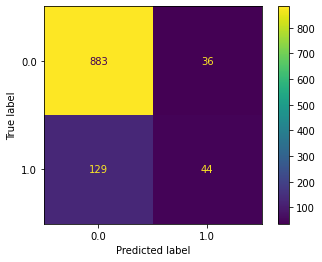

In [126]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

display.plot()
plt.show()

In [127]:
confusion_matrix(y_test,y_pred_test)

array([[883,  36],
       [129,  44]])

In [128]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2141
         1.0       0.54      0.22      0.32       405

    accuracy                           0.85      2546
   macro avg       0.70      0.59      0.61      2546
weighted avg       0.81      0.85      0.82      2546



In [129]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       919
         1.0       0.55      0.25      0.35       173

    accuracy                           0.85      1092
   macro avg       0.71      0.61      0.63      1092
weighted avg       0.82      0.85      0.82      1092



Hasil pengujian model Logistic regression:
- Dikarenakan data yang diambil tidak balance maka nilai accuracy dan nilai f1-score tidak dapat digunakan. Maka dari itu untuk menilai model dapat melihat nilai percision ataupun nilai recall saja . Pemilihan dilihat pada skema yang dibentuk dalam prediksi, kategori  0 atau kategori 1 yang menjadi bahasan penting.
- coefisien matrix menunjukan bahwasannya model dengan sangat baik memprediksi kategori 0, dapat dilihat pada nilai yang dilaporkan. model kurang baik memprediksi kategori 1, seperti yang dilaporkan dalam confusion matrix. 
- Hasil yang sama juga dilihat dari nilai precision dan recall,yaitu  keduanya menunjukan nilai yang baik untuk prediksi kategori 0 dan nilai yang buruk untuk kategori 1

## Model Building SVM

In [130]:
svc = SVC(kernel='poly', C=0.5, probability=True)
svc.fit(X_train, y_train)

svc_train = svc.predict(X_train)
svc_test = svc.predict(X_test)

## Model Evaluation SVM

In [131]:
print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2141
         1.0       0.92      0.13      0.23       405

    accuracy                           0.86      2546
   macro avg       0.89      0.57      0.58      2546
weighted avg       0.87      0.86      0.81      2546

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       919
         1.0       1.00      0.20      0.33       173

    accuracy                           0.87      1092
   macro avg       0.93      0.60      0.63      1092
weighted avg       0.89      0.87      0.83      1092



Hasil pengujian model svm
- Dikarenakan data yang diambil tidak balance maka nilai accuracy dan nilai f1-score tidak dapat digunakan. Maka dari itu untuk menilai model dapat melihat nilai percision ataupun nilai recall saja . Pemilihan dilihat pada skema yang dibentuk dalam prediksi, kategori  0 atau kategori 1 yang menjadi bahasan penting.
- coefisien matrix menunjukan bahwasannya model dengan sangat baik memprediksi kategori 0, dapat dilihat pada nilai yang dilaporkan. model kurang baik memprediksi kategori 1, seperti yang dilaporkan dalam confusion matrix. 
- Hasil yang sama juga dilihat dari nilai precision dan recall,yaitu  keduanya menunjukan nilai yang baik untuk prediksi kategori 0 dan nilai yang buruk untuk kategori 1

## Model Inference

In [132]:
data_inf

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,60,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,2415,80,United-States,>50K
1,58,Private,Masters,Widowed,Sales,Not-in-family,White,Female,0.0,0,27,United-States,<=50K
2,19,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,0.0,0,28,United-States,<=50K
3,29,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,0.0,0,34,United-States,<=50K
4,20,Private,Some-college,Never-married,Sales,Own-child,White,Female,0.0,0,8,United-States,<=50K


In [133]:
# capping outlier
inf = wins.transform(data_inf)
inf.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,60.0,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,2415,80.0,United-States,>50K
1,58.0,Private,Masters,Widowed,Sales,Not-in-family,White,Female,0.0,0,27.0,United-States,<=50K
2,19.0,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,0.0,0,28.0,United-States,<=50K
3,29.0,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,0.0,0,34.0,United-States,<=50K
4,20.0,Private,Some-college,Never-married,Sales,Own-child,White,Female,0.0,0,8.0,United-States,<=50K


In [134]:
num_inf = inf.select_dtypes(exclude=['object']).columns.tolist()
cat_inf = inf.select_dtypes(include=['object']).columns.tolist()

In [135]:
data_inf_cat= inf[cat_inf]
data_inf_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket
0,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
1,Private,Masters,Widowed,Sales,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,United-States,<=50K
3,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States,<=50K
4,Private,Some-college,Never-married,Sales,Own-child,White,Female,United-States,<=50K


In [136]:
native_continent = []

for loc in data_inf_cat['native_country']:
    if loc in ['Philippines','Vietnam','China','Taiwan','Japan','Thailand','India','Iran']:
        native_continent.append('Asia')
    elif loc in ['South']:
        native_continent.append('Australia')
    elif loc in ['England','France','Poland','Germany','Italy','Hungary','Portugal','Scotland','Greece','Yugoslavia']:
        native_continent.append('Europe')
    elif loc in ['United-States','Canada','Cuba','Puerto-Rico','Mexico','Haiti', 'Guatemala','El-Salvador','Dominican-Republic','Jamaica','Nicaragua','Honduras','Outlying-US(Guam-USVI-etc)']:
        native_continent.append('North America')
    elif loc in ['Columbia', 'Ecuador','Trinadad&Tobago','Peru']:
        native_continent.append('South America')
    else:
        native_continent.append('Africa')

data_inf_cat['native_continent'] = native_continent

In [137]:
occup_change_to = []

for i in data_inf_cat['occupation']:
    if i in occup_change:
        occup_change_to.append(i)
    else:
        occup_change_to.append('Other-service')

data_inf_cat['occupation_new'] = occup_change_to.copy()

In [138]:
workclass_new = []

for work in data_inf_cat['workclass']:
    if work in ['Private']:
        workclass_new.append('Private')
    elif work in ['Self-emp-not-inc','Self-emp-inc']:
        workclass_new.append('Self-Emp')
    elif work in ['Local-gov','State-gov','Federal-gov']:
        workclass_new.append('Gov')
    else:
        workclass_new.append('Others')

data_inf_cat['workclass_new'] = workclass_new

In [139]:
marital_status_new = []

for work in data_inf_cat['marital_status']:
    if work in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        marital_status_new.append('married')
    elif work in ['Divorced','Widowed','Separated']:
        marital_status_new.append('ever-married')
    else:
        marital_status_new.append('single')

data_inf_cat['marital_status_new'] = marital_status_new

In [140]:
education_new = []

for work in data_inf_cat['education']:
    if work in ['Masters','Prof-school','Doctorate']:
        education_new.append('post-graduate')
    elif work in ['Some-college','Assoc-voc','Assoc-acdm','Bachelors']:
        education_new.append('graduate')
    elif work in ['10th','11th','12th','HS-grad']:
        education_new.append('senior-hs')
    elif work in ['7th-8th','9th']:
        education_new.append('junior-hs')
    else:
        education_new.append('elementary')

data_inf_cat['education_new'] = education_new

In [141]:
category_ohe_inf = pd.DataFrame(ohe_encoder.transform(data_inf_cat[['workclass_new','marital_status_new','occupation_new','relationship','native_continent']]))
category_ohe_inf.columns = ohe_encoder.get_feature_names(['workclass_new','marital_status_new','occupation_new','relationship','native_continent'])


In [142]:
category_ord_inf = pd.DataFrame(ord_encoder.transform(data_inf_cat[['education_new','sex','income_bracket']]))

category_ord_inf.columns = ['education_new_ord','sex_ord','income_bracket_ord']


In [143]:
data_model_inf = pd.concat([data_inf.reset_index(drop=True), category_ohe_inf, category_ord_inf], axis=1)
data_model_inf.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,relationship_Unmarried,relationship_Wife,native_continent_Asia,native_continent_Australia,native_continent_Europe,native_continent_North America,native_continent_South America,education_new_ord,sex_ord,income_bracket_ord
0,60,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,2415,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0
1,58,Private,Masters,Widowed,Sales,Not-in-family,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0
2,19,Private,Some-college,Never-married,Sales,Not-in-family,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
3,29,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,20,Private,Some-college,Never-married,Sales,Own-child,White,Female,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0


In [144]:
droplist = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','income_bracket']
data_modelinf = data_model_inf.drop(droplist, axis=1)

In [145]:
inference_model = data_modelinf[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]
inference_model

,age,capital_gain,hours_per_week,marital_status_new_married,income_bracket_ord
0,60,0.0,80,1.0,1.0
1,58,0.0,27,0.0,0.0
2,19,0.0,28,0.0,0.0
3,29,0.0,34,0.0,0.0
4,20,0.0,8,0.0,0.0


In [146]:

num_scaled1 = pd.DataFrame(scaler.transform(inference_model[num_col_scalling]))
num_scaled1.columns = num_col_scalling

inference_model.drop(num_col_scalling, axis=1, inplace=True)
inference_model = pd.concat([inference_model, num_scaled1], axis=1)

inference_model= inference_model[['age','capital_gain','hours_per_week',
                  'marital_status_new_married','income_bracket_ord']]

In [147]:
X_inf = inference_model.drop('income_bracket_ord',axis=1).copy()


In [148]:
X_inf 

,age,capital_gain,hours_per_week,marital_status_new_married
0,0.589041,0.0,0.806122,1.0
1,0.561644,0.0,0.265306,0.0
2,0.027397,0.0,0.275510,0.0
3,0.164384,0.0,0.336735,0.0
4,0.041096,0.0,0.071429,0.0


In [149]:
log_model.predict(X_inf)

array([1., 0., 0., 0., 0.])

In [150]:
svc.predict(X_inf)

array([0., 0., 0., 0., 0.])

## Conceptual Problems 

Jawab pertanyaan berikut:

- Apakah yang dimaksud dengan coeficient pada logistic regression?
- Apakah yang dimaksud dengan Support Vector pada SVM?
- Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

Koefisien dalam regresi logistik menyiratkan peningkatan logaritmik dalam peluang nilai prediksi. ini berarti semakin tinggi koefisien semakin besar kemungkinan hasil positif diprediksi dengan setiap kenaikan nilai prediktor/fitur.


support vector di SVM menggambarkan titik data yang mendukung orientasi hyperplane classifier. vektor pendukung ini adalah titik data yang menyentuh margin hyperplane, oleh karena itu margin maksimum model memengaruhi cara vektor dukungan berinteraksi dengan model.

Parameter kernel SVM menjelaskan cara model mengambil input dan mengubahnya untuk diproses. salah satu kernel ini adalah kernel sigmoid. kernel sigmoid biasanya digunakan untuk jaringan saraf tiruan yang mensimulasikan model jaringan saraf perceptron dua lapis



## Kesimpulan 

Hasil pengujian model svm dan logistic regression 
- Dikarenakan data yang diambil tidak balance maka nilai accuracy dan nilai f1-score tidak dapat digunakan. Maka dari itu untuk menilai model dapat melihat nilai percision ataupun nilai recall saja . Pemilihan dilihat pada skema yang dibentuk dalam prediksi, kategori  0 atau kategori 1 yang menjadi bahasan penting.
- coefisien matrix menunjukan bahwasannya model dengan sangat baik memprediksi kategori 0, dapat dilihat pada nilai yang dilaporkan. model kurang baik memprediksi kategori 1, seperti yang dilaporkan dalam confusion matrix. 
- Hasil yang sama juga dilihat dari nilai precision dan recall,yaitu  keduanya menunjukan nilai yang baik untuk prediksi kategori 0 dan nilai yang buruk untuk kategori 1

